(DUALIDADLEMAFARKASCONDKKT)=

# 4.4 Dualidad, lema de Farkas y condiciones de Karush-Kuhn-Tucker (KKT) de optimalidad

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Conocerá el problema dual asociado a un programa lineal al que se le nombra primal.

* Dará una interpretación al problema dual a partir de un ejemplo prototipo.

* Aprenderá las relaciones que mantienen el problema primal y el dual. En específico la dualidad débil y dualidad fuerte son muy importantes.

* Aprenderá el lema de Farkas, las condiciones de Karush-Kuhn-Tucker de optimalidad para programas lineales y la relación entre el lema y las condiciones.

* Utilizará la función Lagrangiana y las condiciones de Karush-Kuhn-Tucker de optimalidad para dar una justificación de los pasos que sigue el método símplex para encontrar óptimos de programas lineales.

```

## Ejemplo prototipo

Considérese el problema planteado en {ref}`ejemplo prototipo <EJPROTOTIPO>` con sus suposiciones. El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$, la ganancia total, sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas disponibles en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

El término $3x_1$ representa la ganancia generada (en miles de pesos) cuando se fabrica el producto 1 a una tasa de $x_1$ lotes por semana. Se tienen contribuciones individuales de cada producto a la ganancia. Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar la ganancia total sujeta a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

La región factible y el valor óptimo del PL anterior es:

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

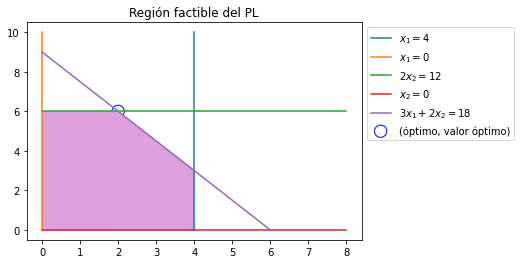

In [2]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

optimal_point = (2, 6)

plt.scatter(optimal_point[0], optimal_point[1], marker='o', s=150,
            facecolors='none', edgecolors='b')
plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


```{admonition} Definición

Asociado a todo problema de programación lineal existe otro problema lineal con nombre **dual**. Al problema "original" se le nombra **primal**.

```

```{admonition} Observación
:class: tip

Realmente no importa a cuál de los problemas se le dé el nombre primal y a cuál el de dual. La convención es que el modelo que se formula para representar el problema real recibe el nombre de problema primal no importando la forma que tiene (estándar u otra).

```

## Problema primal del ejemplo prototipo

El problema **primal** anterior escrito en notación vectorial y matricial es:

$$\displaystyle \max_{x \in \mathbb{R}^2} (-c)^Tx$$

$$\text{sujeto a: }$$

$$Ax \leq b$$

$$x \geq 0$$

donde: $
A= 
\left [
\begin{array}{cc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ], x=
\left [
\begin{array}{c}
x_1 \\
x_2 \\
\end{array}
\right ], b=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]$ y 
$c = \left [ \begin{array}{c} -3 \\ -5 \end{array}\right]$ representa al vector de costos unitarios o equivalentemente $-c$ el vector de ganancias unitarias. La última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero (son mayores o iguales a cero de una forma *pointwise*). El PL busca maximizar $f_o(x) = (-c)^Tx$, la ganancia total.

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{admonition} Comentario

En el contexto del PL ejemplo se tiene:

$f_o$: ganancia total debida a todas las actividades (función objetivo). En el ejemplo es la ganancia semanal total (en miles de pesos) que generan los productos $1$ y $2$.

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$ (variables de optimización primales). En el ejemplo $n=2$. $x_1$ es el número de lotes del producto $1$ que se fabrican por semana (análogamente $x_2$).

$c_j$: costo unitario debido a la actividad j con $j=1, 2, \dots, n$ ($-c_j$ es la ganancia unitaria).

$b_i$: cantidad disponible del recurso $i$ para asignarse a las actividades con $i=1, 2, \dots, m$. En el ejemplo $m=3$. $b_1=4$ representa el número de horas de producción disponibles por semana en la planta $1$ para fabricar los lotes de los productos $1$ y $2$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$ con $i=1, 2, \dots n$, $j=1, 2, \dots m$. En el ejemplo se consumen $3$ horas para producir el producto $1$ y $2$ horas para el $2$ de las $18$ horas disponibles en la planta $3$.

```

(PROBDUALEJPROTOTIPO)=

## Problema dual del ejemplo prototipo

El problema **dual** asociado al problema anterior es:

```{margin}

Por ahora tómese como válida la expresión del problema dual, en esta primera parte se busca señalar las relaciones existentes con el problema primal y no la forma matemática de obtenerlo.

```

$$\displaystyle \min_{-\lambda \in \mathbb{R}^3} b^T(-\lambda)$$

$$\text{sujeto a: }$$

$$A^T(-\lambda) \geq -c$$

$$-\lambda \geq 0$$

Las desigualdades se intrepretan que son mayores o iguales al vector del lado derecho de una forma *pointwise*. Escrito con escalares es:

$$\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$\text{sujeto a: }$$

$$-\lambda_1 -3 \lambda_3 \geq 3$$

$$-2 \lambda_2 - 2 \lambda_3 \geq 5$$

$$-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0$$

```{admonition} Definición

La variable de optimización y función objetivo del problema primal se nombran variable de optimización primal y función objetivo primal. Análogamente para el problema dual la variable de optimización y función objetivo del problema dual se nombran variable de optimización dual y función objetivo dual.

```

```{admonition} Observación
:class: tip

Se utiliza como variable de optimización dual $-\lambda$ pues la función objetivo primal es $(-c)^Tx$. Las expresiones cambian un poco si se utiliza una función objetivo primal igual a $c^Tx$.

```

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

```{admonition} Comentarios

* El problema dual usa exactamente los mismos parámetros (los valores $c_j, b_i, a_{ij}$) del problema primal pero en diferentes lugares:

    * Los coeficientes de la función objetivo primal son los lados derechos de las restricciones funcionales del problema dual.
    
    * Los lados derechos de las restricciones funcionales del problema primal son los coeficientes de la función objetivo dual.
    
    * Los coeficientes de una variable de las restricciones funcionales del problema primal son los coeficientes de una restricción funcional del problema dual. Por ejemplo: en las restricciones funcionales $x_1 \leq 4$, $2x_2 \leq 12$ y $3x_1 + 2x_2 \leq 18$ del problema primal los coeficientes de $x_1$ son $1, 0, 3$ respectivamente, en el problema dual se tienen estos mismos coeficientes para la restricción funcional:$-\lambda_1 -3 \lambda_3 \geq 3$ (recuérdese que la variable de optimización dual que estamos analizando es $-\lambda$). 


```

## Interpretación del problema dual

Considérese las siguientes formas de los modelos de optimización primal-dual para el problema del inicio:

$$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&& &&
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       && &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    && &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && && -\lambda_1 \geq 0 \\
x_1 \geq 0              && && -\lambda_2 \geq 0 \\
x_2 \geq 0              && && -\lambda_3 \geq 0
\end{align*}$$

```{margin}

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


Recordemos algunos enunciados y resultados que obtuvimos en el {ref}`ejemplo del método gráfico <EJMETGRAFICOPL>` y en el {ref}`ejemplo del método símplex <EJMETSIMPLEXAPLICADOEJPROTOTIPO>` para el problema primal en su forma **aumentada**, ver {ref}`forma aumentada de un PL <FORMAAUMENTADAPL>`:

* La solución óptima (no aumentada) es $x^* = \left [ \begin{array}{c} 2 \\ 6\end{array} \right ]$ con valor de la función objetivo $f_o(x^*) = (-c)^Tx^* = 36$.


* La relación entre $f_o(x)$ y el vector $\nu$ en el método símplex es: $f_o(x) = b^T(-\nu)$. **Sin embargo** recuérdese que el vector $\nu$ surgió por el uso de la función Lagraniana para restricciones de igualdad en la forma aumentada.

```{margin}

Recuérdese que los multiplicadores de Lagrange $\nu, \lambda$ se asocian a igualdades y desigualdades respectivamente, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```

* En esta sección consideramos una forma del PL **no aumentada, pues sólo tiene desigualdades**. Por tanto sólo tenemos al multiplicador $\lambda$. Entonces se cumple que **no** tenemos vector $\nu$ y más bien $\lambda$ es el **único** vector multiplicador de Lagrange que tenemos y se cumple: $f_o(x) = b^T(- \lambda)$.

* Para la forma aumentada del PL se obtuvo que el valor del vector óptimo $\nu$ es: $\nu^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$ y por el punto anterior: $\lambda^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$.

* El valor óptimo de la función objetivo entonces se puede calcular a partir de $\lambda^*$: $f_o(x) = b^T(-\lambda^*) = -[4 \quad 12 \quad 18] \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ] = - (-36) = 36$.

```{margin}

En el {ref}`ejemplo del método símplex <EJMETSIMPLEXAPLICADOEJPROTOTIPO>` se tenía la relación $\lambda_{B_j} =  -c_{B_j} + \nu^Ta_j \quad j \in \mathcal{B}$, $\lambda_{N_j} =  -c_{N_j} + \nu^Ta_j \quad j \in \mathcal{N}$ pero no estamos trabajando directamente con la forma aumentada del problema dual por lo que sólo tenemos vector $\lambda$.

```

* Los coeficientes $\lambda_{B_j}, \lambda_{N_j}$ en el método de símplex se escriben como (haciendo uso que $\lambda$ es el **único** vector multiplicador de Lagrange que tenemos):

$$\lambda_{B_j} =  -c_{B_j} + \lambda[1:3]^Ta_j \quad j \in \mathcal{B}$$

$$\lambda_{N_j} =  -c_{N_j} + \lambda[1:3]^Ta_j \quad j \in \mathcal{N}$$

```{margin}

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


con $\mathcal{B}, \mathcal{N}$ conjunto de índices de variables básicas y no básicas respectivamente; $\lambda[1:3]$ el vector de la posición $1$ a $3$ de $\lambda$ que contiene a las variables $\lambda_1, \lambda_2, \lambda_3$ y $a_j$ $j$-ésima columna de $A \in \mathbb{R}^{3 \times 5}$. $A$ es la matriz del sistema de ecuaciones lineales del problema primal:

$$A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
$$

* En el método símplex se mantiene en cada iteración $\lambda_{B_j} = 0 \forall j \in \mathcal{B}$ y se **busca** satisfacer la **condición de optimalidad**: $\lambda_{N_j} \forall j \in \mathcal{N}$ **sea no negativo para problemas de minimización o no positivo para problemas de maximización**.

La interpretación del problema dual podemos realizarla por partes, siendo las primeras las relacionadas con la función objetivo de éste: $b^T(-\lambda)$ y su variable de optimización: $-\lambda$.


### Función objetivo y variable de optimización del problema dual

La función objetivo dual es:

$$b^T(-\lambda) = b_1(-\lambda_1) + b_2(-\lambda_2) + \dots + b_m(-\lambda_m)$$

con $b_i$ $i$-ésima componente del vector $b$ que representa al recurso $i=1, 2, \dots, m$. 


```{margin}

$
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

Como se vio arriba en el método símplex los valores de las funciones objetivo de cada problema tienen un valor numérico igual en las soluciones óptimas: $f_o(x^*) = (-c)^Tx^* = b^T(-\lambda^*) = 36$. Por ello, cada término $b_i (-\lambda_i)$ puede interpretarse como la contribución a la ganancia por consumir $b_i$ unidades del recurso $i$ en el problema primal.

Así, la variable de optimización dual $-\lambda_i$ se interpreta como la contribución a la ganancia por unidad del recurso $i$ y minimizar $b^T(-\lambda)$ es minimizar el valor total de los recursos consumidos por las actividades. En el ejemplo los recursos recuérdese que son el número de horas de producción disponibles por semana en las plantas para producir los productos $1$ y $2$.

```{sidebar} Un poco de historia ...

Ver [nobel prize: Leonid Vitaliyevich Kantorovich prize lecture](https://www.nobelprize.org/prizes/economic-sciences/1975/kantorovich/lecture/)

```

```{admonition} Comentario

En Economía se nombra al vector $-\lambda^*$ [shadow prices](https://en.wikipedia.org/wiki/Shadow_price). Sus componentes indican que un incremento individual de una unidad en cualquier $b_i$ aumentará en $-\lambda_i^*$ el valor óptimo de la función objetivo, la ganancia total semanal en miles de pesos. Es una interpretación en términos marginales para cada recurso $i$.

```

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

### Lados izquierdos de las restricciones funcionales

En el problema primal la cantidad de recurso $i$ consumido por cada unidad de la actividad $j$ está dado por $a_{ij}$. Se vio que la variable dual $-\lambda_i$ es la contribución a la ganancia por unidad consumida del recurso $i$. Por esto, la suma $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ se interpreta como la contribución a la ganancia de la **mezcla de recursos** $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ que se consumiría si se usara una unidad de la actividad $j$ con $i=1, 2, \dots, m$, $j=1, 2, \dots, n$.

En el ejemplo, una unidad de la actividad $j$ corresponde a producir $1$ lote del producto $j$ por semana, $j=1, 2$. La mezcla de recursos consumida al producir $1$ lote del producto $1$ es $1$ hora de producción de la planta $1$ y $3$ horas de la planta $3$: $1(-\lambda_1) + 3(-\lambda_3) \geq 3$ que es el lado izquierdo de la primera restricción funcional del problema dual. La mezcla correspondiente por lote del producto $2$ es $2$ horas de cada una de las plantas $2$ y $3$: $2(-\lambda_2) + 2(-\lambda_3) \geq 5$. Los lados izquierdos de las restricciones funcionales en el problema dual son las contribuciones a la ganancia en miles de pesos de estas mezclas de recursos por lote producido por semana de los productos respectivos.

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

### Restricciones funcionales y de no negatividad

El valor $-c_j$ es la ganancia unitaria que se obtiene por la actividad $j$ por lo que $\displaystyle \sum_{i=1}^m a_{ij}(-\lambda_i) \geq c_j$ indica que la contribución a la ganancia de la mezcla de recursos debe ser, por lo menos, tan grande como si $1$ unidad de la actividad $j$ la utilizara para $j=1, 2, \dots, n$.


En el ejemplo, las ganancias unitarias (en miles de pesos por semana) son $-c_1 = 3$ y $-c_2 = 5$ por la producción del producto $1$ y $2$ respectivamente. La restricción funcional $-\lambda_1 -3\lambda_3 \geq 3$ entonces indica que la producción del producto $1$ en la planta $1$ y $3$ debe ser al menos tan redituable que la ganancia que se obtiene por el producto $1$: $3$ mil pesos.

La restricción $-\lambda_i$ indica que la contribución a la ganancia por el recurso $i$, $i=1,2, \dots, m$ debe ser no negativa. De lo contrario sería mejor no utilizar este recurso.

## Forma aumentada del problema dual

El problema dual es un problema PL por lo que también tiene soluciones en un vértice que pueden ser factibles (FEV) o no factibles (NFEV), ver {ref}`soluciones FEV y NFEV <SOLFEVNFEV>`. También tiene una forma aumentada y por tanto tiene soluciones básicas factibles (BF) o no factibles (NBF). Para el ejemplo prototipo la forma aumentada es:

```{margin}

En notación matricial es:

$\displaystyle \min_{-\lambda \in \mathbb{R}^5} (-\lambda)^Tb \\
\text{sujeto a: }\\
A^T(-\lambda) = -c \\
-\lambda \geq 0
$
```


$$\displaystyle \min_{-\lambda \in \mathbb{R}^5} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$\text{sujeto a: }$$

$$-\lambda_1 -3 \lambda_3 + \lambda_4 = 3$$

$$-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5$$

$$-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0$$

De aquí en adelante **consideraremos la forma aumentada** de ambos problemas por lo que $x \in \mathbb{R}^5$, $-\lambda \in \mathbb{R}^5$.

```{admonition} Comentario

Las variables duales $-\lambda_4, -\lambda_5$ son variables consideradas de **superávit**, ***surplus variables***, (obsérvese la diferencia con las variables de holgura).

```

```{margin}

Forma estándar de un PL:

$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$
```

```{admonition} Observación
:class: tip

Obsérvese que en este ejemplo la forma aumentada del dual corresponde a la forma estándar de los PL.

```

## Variables básicas y no básicas del problema dual

Con la forma aumentada del problema dual podemos aplicar el método símplex al problema dual con lo que se tendrán variables básicas y no básicas. La misma {ref}`definición <VARBASICASNOBASICAS>` para tales variables se tiene en este problema dual. En cada iteración el método símplex designa $n$ variables básicas y $m$ variables no básicas. Las no básicas les asigna el valor de cero. 

```{admonition} Comentario

Recuérdese que al aplicar el método símplex al problema primal se desginó $m$ variables básicas y $n$ variables no básicas. Se verá que el número de variables básicas y no básicas "están volteadas" en uno y otro problema.

```

```{admonition} Definición

Las variables básicas o no básicas del problema primal se les nombra variables básicas o no básicas primales. Análogamente, las variables básicas o no básicas del problema dual se les nombra variables básicas o no básicas duales.

```

En lo que continúa se **asume** que se aplica el método símplex a la forma aumentada del problema primal.

## Relaciones entre el problema primal y el problema dual

Podemos encontrar las variables básicas y no básicas duales del ejemplo prototipo a partir de una **relación que se cumple entre el problema primal y el dual**. Para esto, a continuación se presenta una tabla en la que cada renglón representa una solución básica del problema primal del ejemplo prototipo. En el margen se presenta la gráfica de los puntos FEV y NFEV que nos ayuda a ubicar cada solución básica (BF o NBF) del problema primal con las primeras dos coordenadas con los puntos en la gráfica. En la última columna se presenta el valor de la función objetivo del problema primal:

```{margin}

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


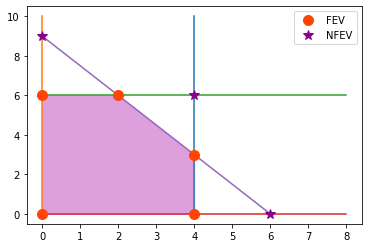

In [3]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")


ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")


point_FEV_1 = (0,0)
point_FEV_2 = (0,6)  
point_FEV_3 = (2,6) 
point_FEV_4 = (4,3) 
point_FEV_5 = (4,0)


array_FEV = np.row_stack((point_FEV_1,
                          point_FEV_2,
                          point_FEV_3,
                          point_FEV_4,
                          point_FEV_5))

point_NFEV_1 = (0, 9)
point_NFEV_2 = (4, 6)
point_NFEV_3 = (6, 0)

array_NFEV = np.row_stack((point_NFEV_1,
                           point_NFEV_2,
                           point_NFEV_3))


ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

|Renglón|Solución Básica $(x_1, x_2, x_3, x_4, x_5)^T$| ¿Factible?| Valor $f_o$|
|:---:|:---:|:---:|:---:|
|1|(0, 0, 4, 12, 18)|Sí|0|
|2|(4, 0, 0, 12, 6)|Sí|12|
|3|(6, 0, -2, 12, 0)|No|18|
|4|(4, 3, 0, 6, 0)|Sí|27|
|5|(0, 6, 4, 0, 6)|Sí|30|
|6|(2, 6, 2, 0, 0)|Sí|36|
|7|(4, 6, 0, 0, -6)|No|42|
|8|(0,9,4,-6,0)|No|45|

Por ejemplo para el renglón $7$ el valor de $f_o$ es: $(-c)^Tx = -[-3 \quad -5 \quad 0 \quad 0 \quad 0] \left [\begin{array}{c}4 \\ 6 \\ 0 \\ 0 \\ -6\end{array}\right ] = 42$. El número de variables no básicas primales es igual a $2$ y el número de variables básicas primales es igual a $3$ en todos los renglones.

```{margin}

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


```{admonition} Observación
:class: tip

La tabla anterior puede obtenerse resolviendo el sistema de ecuaciones lineales que se obtiene a partir de las restricciones del problema primal. Se designan $2$ variables no básicas primales que se igualan a cero y se resuelve el sistema de $3 \times 3$ resultante.

```

```{admonition} Definición

Se nombran soluciones primales a las soluciones del problema primal. Análogamente, soluciones duales son las soluciones del problema dual.


```

### Relación 1

Las soluciones básicas primales corresponden con soluciones básicas duales.

```{margin}

En el {ref}`ejemplo del método símplex <EJMETSIMPLEXAPLICADOEJPROTOTIPO>` se tenía la relación $\nu = B^{-T} c_B$ pero como estamos trabajando directamente con la forma aumentada del problema dual sólo tenemos vector $\lambda$.

```

```{margin}

Recuérdese que $\lambda[1:3]$ es el vector de la posición $1$ a $3$ de $\lambda$ que contiene a las variables $\lambda_1, \lambda_2, \lambda_3$

```

```{margin}

En el método símplex podemos tener variables básicas (primales o duales) con valor igual a cero.

```

Las soluciones básicas duales las podemos obtener a partir de la tabla anterior y la ecuación establecida en el {ref}`ejemplo del método símplex <EJMETSIMPLEXAPLICADOEJPROTOTIPO>`: $\lambda[1:3] = B^{-T} c_B$. Además **para este ejemplo** las variables básicas primales siempre son diferentes de cero por lo que podemos realizar lo siguiente. 

Obtendremos las soluciones básicas duales por renglones a partir de las soluciones básicas primales.


Para el primer renglón recordemos que se utilizan a las variables $x_3, x_4, x_5$ como básicas primales y $x_1, x_2$ como no básicas primales (son iguales a cero). También  $B$ es la matriz identidad y el vector de costos es $c_B = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$ entonces 

$$\lambda[1:3] = B^{-T}c_B = 0$$

esto es, $\lambda_1 = \lambda_2 = \lambda_3 = 0$. 


Para $\lambda_4$ y $\lambda_5$ tenemos dos opciones. La primera es resolver el sistema de ecuaciones lineales del problema dual en su forma aumentada con los valores ya calculados:



```{margin}

La forma aumentada del problema dual del ejemplo prototipo recuérdese es:

$
\displaystyle \min_{-\lambda \in \mathbb{R}^5} -4\lambda_1 -12 \lambda_2 -18 \lambda_3 \\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \\
-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0 \\
$

```

$$
\begin{eqnarray}
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \nonumber \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \nonumber\\
\end{eqnarray}
$$

In [4]:
#lambda_1, lambda_2, lambda_3 values:
lambda_B = np.array([0,0,0])

In [5]:
lambda_1, lambda_2, lambda_3, lambda_4, lambda_5 = sympy.symbols("lambda_1, lambda_2, lambda_3, lambda_4, lambda_5")

```{margin}

Definimos con `SymPy` la ecuación $-\lambda_1 -3 \lambda_3 + \lambda_4 - 3 = 0$

```

In [6]:
eq1 = -lambda_1 -3*lambda_3 + lambda_4 - 3

```{margin}

Definimos con `SymPy` la ecuación $-2 \lambda_2 - 2 \lambda_3 + \lambda_5 -5 = 0$

```

In [7]:
eq2 = -2*lambda_2 -2*lambda_3 +lambda_5 - 5

```{margin}

Sustituimos los valores calculados del vector $\lambda[1:3]$.

```

In [8]:
sympy.pprint(eq1.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₄ - 3


Por tanto $\lambda_4 = 3$.

```{margin}

Sustituimos los valores calculados del vector $\lambda[1:3]$.

```

In [9]:
sympy.pprint(eq2.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₅ - 5


Por tanto $\lambda_5 = 5$ y $\lambda = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \\ 3 \\ 5 \end{array} \right ]$. La otra opción para calcular $\lambda_4, \lambda_5$ es con la relación:

$$\lambda_{N_j} = -c_{N_j} + \lambda[1:3]^Ta_j, \quad j \in \mathcal{N}$$

```{margin}

$A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
$

```

donde: $\mathcal{N}$ es el conjunto de índices no básicos primales **inicial** y $a_j$ es la $j$-ésima columna de $A$. 

In [10]:
#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]
A = np.array([[1, 0, 1, 0, 0],
              [0, 2, 0, 1, 0],
              [3, 2, 0, 0, 1]])
c_N = np.array([-3, -5])

El valor de $\lambda_4$ es:

In [11]:
print(-c_N[N_list_idx[0]] + np.dot(lambda_B, A[:,N_list_idx[0]]))

3


El valor de $\lambda_5$ es:

In [12]:
print(-c_N[N_list_idx[1]] + np.dot(lambda_B, A[:,N_list_idx[1]]))

5


```{margin}

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


Los siguientes renglones lo podemos obtener observando respecto al primer renglón qué variables básicas o no básicas primales pasan a ser no básicas o básicas primales respectivamente. Para identificar lo anterior, recordemos que los valores iguales a cero en cada renglón corresponden a variables no básicas primales (pues es un ejemplo en el que no tenemos variables básicas primales iguales a cero). Así, podemos ir intercambiando las columnas de la matriz $B$ inicial (identidad) con columnas de la matriz $A$ del sistema de ecuaciones lineales del problema primal de la forma aumentada. También tal intercambio lo realizamos entre los vectores $c_B$ y $c_N$:

$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ], B = 
\left [
\begin{array}{ccc}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ], c_B=\left [ \begin{array}{c}0 \\ 0 \\ 0\end{array}\right ], c_N = \left [ \begin{array}{c} -3 \\ -5 \\ \end{array} \right ]
$$

```{margin}

|Renglón|$(x_1, x_2, x_3, x_4, x_5)^T$|
|:---:|:---:|
|1|(0, 0, 4, 12, 18)|
|2|(4, 0, 0, 12, 6)|
|3|(6, 0, -2, 12, 0)|
|4|(4, 3, 0, 6, 0)|
|5|(0, 6, 4, 0, 6)|
|6|(2, 6, 2, 0, 0)|
|7|(4, 6, 0, 0, -6)|
|8|(0,9,4,-6,0)|

```

Por ejemplo para el renglón número $2$ de la tabla anterior (que se muestra en el margen) corresponde a un intercambio entre la primera columna de $B$ con la primer columna de $A$. Viendo el primer renglón, se observa que la variable $x_1$ que es no básica primal pasa a ser básica primal en el segundo renglón y la variable $x_3$ pasa de ser básica primal en el primero a ser no básica primal en el segundo renglón. Realizando este mismo intercambio entre $c_B$ y $c_N$ se tiene:

$$
B = \left [ 
\begin{array}{ccc} 
1 & 0 & 0 \\ 
0 & 1 & 0 \\ 
3 & 0 & 1 
\end{array} \right ], c_B = \left [ \begin{array}{c}-3 \\ 0 \\ 0\end{array}\right ]
$$

In [13]:
B = np.eye(3)
c_B = np.array([0, 0, 0])
c_N = np.array([-3, -5])

In [14]:
#ordered list of indexes of A that will be interchanged
list_idx_A = [0]
#ordered list of indexes of B that will be interchanged
list_idx_B = [0]

In [15]:
B[:,list_idx_B] = A[:,list_idx_A]

In [16]:
c_B[list_idx_B] = c_N[list_idx_A]

```{margin}

Utilizamos la relación $\lambda[1:3] = B^{-T}c_B = 0$

```

In [17]:
lambda_B = np.linalg.solve(B.T, c_B)

In [18]:
print(lambda_B)

[-3.  0.  0.]


```{margin}

La forma aumentada del problema dual del ejemplo prototipo recuérdese es:

$
\displaystyle \min_{-\lambda \in \mathbb{R}^5} -4\lambda_1 -12 \lambda_2 -18 \lambda_3 \\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \\
-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0 \\
$

```

Los otros dos valores del vector $\lambda$ los podemos calcular sustituyendo en el sistema de ecuaciones lineales del problema dual en su forma estándar los valores $\lambda_1, \lambda_2, \lambda_3$ anteriores:

In [19]:
sympy.pprint(eq1.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₄


Por tanto $\lambda_4 = 0$.

In [20]:
sympy.pprint(eq2.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₅ - 5


Por tanto $\lambda_5 = 5$.

```{margin}

Otra forma de calcular $\lambda_4, \lambda_5$ es con la relación $\lambda_{N_j} = -c_{N_j} + \lambda[1:3]^Ta_j, \quad j \in \mathcal{N}$.

```

Entonces: $\lambda = \left [ \begin{array}{c} -3 \\ 0 \\ 0 \\ 0 \\ 5 \end{array} \right ]$. O bien con la relación que se muestra en el margen.

In [21]:
#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]

El valor de $\lambda_4$ es:

In [22]:
print(-c_N[N_list_idx[0]] + np.dot(lambda_B, A[:,N_list_idx[0]]))

0.0


El valor de $\lambda_5$ es:

In [23]:
print(-c_N[N_list_idx[1]] + np.dot(lambda_B, A[:,N_list_idx[1]]))

5.0


Realizando lo anterior para cada renglón anterior obtenemos:

|Renglón|Solución Básica $(\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5)^T$| ¿Factible?| Valor $f_o$|
|:---:|:---:|:---:|:---:|
|1|(0, 0, 0, 3, 5)|No|0|
|2|(-3, 0, 0, 0, 5)|No|12|
|3|(0, 0, -1, 0, 3)|No|18|
|4|(4.5, 0 , -2.5, 0, 0)|No|27|
|5|(0, -2.5, 0, 3, 0)|No|30|
|6|(0, -1.5, -1, 0, 0)|Sí|36|
|7|(-3, -2.5, 0, 0, 0)|Sí|42|
|8|(0, 0, -2.5, -4.5,0)|Sí|45|

```{margin}

En el método símplex podemos tener variables básicas (primales o duales) con valor igual a cero.

```

En **este ejemplo** no se tienen variables básicas duales iguales a cero en ninguna solución básica dual. Por ello, las variables no básicas duales son aquellas que tienen valor igual a cero en cada solución básica dual de la tabla anterior. Asimismo, las variables básicas duales son aquellas que tienen valor diferente de cero en cada solución básica dual. Obsérvese que el número de variables no básicas duales es igual a $3$ y el número de variables básicas duales es igual a $2$ en todos los casos. 

```{admonition} Ejercicio
:class: tip

Obtener las soluciones básicas duales de la tabla anterior a partir de las soluciones básicas primales.

```

En el renglón $7$ el valor de $f_o$ es: $b^T(-\lambda) = [4 \quad 12 \quad 18 \quad 0 \quad 0](-1) \left [\begin{array}{c}-3 \\ -2.5 \\ 0 \\ 0 \\ 0\end{array}\right ] = 42$. Entonces tenemos la siguiente relación.



### Relación 2

Las soluciones básicas primales y duales tienen el mismo valor numérico de la función objetivo de sus problemas respectivos.

Por esta relación podemos juntar ambas tablas en una sola:

|Renglón|Problema Primal||Valor $f_o$|Problema dual||
|:---:|:---:|:---:|:---:|:---:|:---:|
|-|Solución básica primal $(x_1, x_2, x_3, x_4, x_5)^T$|¿Factible?| |Solución básica dual$(\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5)^T$| ¿Factible?|
|1|(0, 0,  4, 12,  18)  |Sí| 0|(  0,    0,    0,    3,  5) |No|
|2|(4, 0,  0, 12,  6 )  |Sí|12|( -3,    0,    0,    0,  5) |No|
|3|(6, 0, -2, 12,  0 )  |No|18|(  0,    0,   -1,    0,  3) |No|
|4|(4, 3,  0,  6,  0 )  |Sí|27|(4.5,    0, -2.5,    0,  0) |No|
|5|(0, 6,  4,  0,  6 )  |Sí|30|(  0, -2.5,    0,    3,  0) |No|
|6|(2, 6,  2,  0,  0 )  |Sí|36|(  0, -1.5,   -1,    0,  0) |Sí|
|7|(4, 6,  0,  0, -6 )  |No|42|( -3, -2.5,    0,    0,  0) |Sí|
|8|(0, 9,  4, -6,  0 )  |No|45|(  0,    0, -2.5, -4.5,  0) |Sí|



### Relación 3: holgura complementaria

```{margin}

|Renglón|Solución básica primal $(x_1, x_2, x_3, x_4, x_5)^T$|Solución básica dual$(\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5)^T$|
|:---:|:---:|:---:|
|1|(0, 0,  4, 12,  18)  |(  0,    0,    0,    3,  5) |
|2|(4, 0,  0, 12,  6 )  |( -3,    0,    0,    0,  5) |
|3|(6, 0, -2, 12,  0 )  |(  0,    0,   -1,    0,  3) |
|4|(4, 3,  0,  6,  0 )  |(4.5,    0, -2.5,    0,  0) |
|5|(0, 6,  4,  0,  6 )  |(  0, -2.5,    0,    3,  0) |
|6|(2, 6,  2,  0,  0 )  |(  0, -1.5,   -1,    0,  0) |
|7|(4, 6,  0,  0, -6 )  |( -3, -2.5,    0,    0,  0) |
|8|(0, 9,  4, -6,  0 )  |(  0,    0, -2.5, -4.5,  0) |

```

Las soluciones básicas primales y duales satisfacen la condición de complementariedad u holgura complementaria. Si $x,  -\lambda$ son soluciones básicas primales, duales respectivamente entonces:

$$x_i^T (-\lambda_i) = 0, \forall i=1, \dots, n$$

Si utilizamos esta propiedad anterior para identificar variables básicas y no básicas primales o duales se tiene lo siguiente:

Si $x_i \neq 0$, por tanto básica primal, entonces por la holgura complementaria $-\lambda_i=0$, por tanto es no básica dual. 

Si $-\lambda_i \neq 0$, por tanto básica dual, entonces por la holgura complementaria $x_i = 0$, por tanto es básica primal.

Esto lo observamos directamente en la tabla que se muestra en el margen. En el renglón $1$ se muestra la solución básica primal al iniciar el método símplex. Las variables básicas primales son $x_3, x_4, x_5$ que en **este ejemplo** tienen valor numérico diferente de cero y sus variables no básicas duales asociadas son respectivamente $-\lambda_1, -\lambda_2, -\lambda_3$ que tienen valor numérico igual a cero. Otros enunciados aplicando la condición de holgura complementaria son:

* En el renglón $4$ se tiene las variables básicas primales $x_1, x_2, x_4$ que en **este ejemplo** tienen valor numérico diferente de cero y sus variables no básicas duales asociadas son $-\lambda_4, -\lambda_5, -\lambda_2$ respectivamente que tienen valor numérico igual a cero.

* En el renglón $2$ se tiene las variables básicas duales $-\lambda_1, -\lambda_5$ con valores numéricos $\lambda_1=-3$, $\lambda_5=5$ que en **este ejemplo** son diferentes de cero y sus variables no básicas primales asociadas son $x_3, x_2$ respectivamente que tienen valor numérico igual a cero.

```{admonition} Comentarios

* Se le nombra holgura complementaria pues para cada par de variables asociadas, si una de ellas tiene holgura en su restricción de no negatividad (variable básica con valor numérico diferente de cero) entonces la otra **no** debe tener holgura (variable no básica con valor numérico igual a cero).

* En este ejemplo se consideran soluciones BF o NBF pero es más común establecer la propiedad de holgura complementaria únicamente para soluciones que son factibles por lo que se tiene:

    * Si $x_i > 0$ entonces $-\lambda_i=0$.

    * Si $-\lambda_i > 0$ entonces $x_i = 0$.

```

```{margin}

|Renglón|¿Primal factible?| ¿Dual factible?|
|:---:|:---:|:---:|
|1|Sí|No|
|2|Sí|No|
|3|No|No|
|4|Sí|No|
|5|Sí|No|
|6|Sí|Sí|
|7|No|Sí|
|8|No|Sí|

```

### Relación 4

```{margin}

Recuérdese que el método símplex busca $\lambda_{N_j} \forall j \in \mathcal{N}$ **sea no negativo para problemas de minimización o no positivo para problemas de maximización**.

```

Las únicas soluciones factibles duales son aquellas que satisfacen la condición de optimalidad del problema primal.

Por ejemplo, los tres últimos renglones de la tabla que se muestra en el margen cumplen con ser soluciones básicas factibles duales. Son factibles pues el método símplex buscará se satisfaga que el multiplicador de Lagrange asociado, $\lambda$, sea no positivo pues se tiene un problema de maximización (para un problema de maximización el método busca que $\lambda$ sea no positivo). Desde la perspectiva del problema primal se satisface la **condición de optimalidad** para estos tres últimos renglones y el método símplex busca esto **además de satisfacer la factibilidad**. Obsérvese que de los últimos tres renglones sólo el renglón $6$ satisface **factibilidad primal**.

```{admonition} Definición

Se nombra primal factible al vector $x$ que satisface todas las restricciones del problema primal y factibilidad primal a la propiedad que un vector debe satisfacer para tales restricciones. En la forma aumentada se tienen las restricciones: $Ax = b$ y $x \geq 0$.

La forma aumentada del problema primal del ejemplo prototipo recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} (-c)^Tx \\
\text{sujeto a: }\\
Ax=b\\
x \geq 0
$$

```

Entonces el método símplex aplicado al problema primal parte de soluciones BF primales, soluciones básicas duales no factibles y busca un óptimo primal o factibilidad dual.

```{margin}

|Renglón|¿Primal factible?| ¿Dual factible?|
|:---:|:---:|:---:|
|1|Sí|No|
|2|Sí|No|
|3|No|No|
|4|Sí|No|
|5|Sí|No|
|6|Sí|Sí|
|7|No|Sí|
|8|No|Sí|

```

### Relación 5

```{margin}

Recuérdese que el método símplex busca $\lambda_{N_j} \forall j \in \mathcal{N}$ **sea no negativo para problemas de minimización o no positivo para problemas de maximización**. Para la relación 5 sólo hay que reescribir lo anterior en términos de $x$.

```

En el caso de **cualquier** problema primal y su problema dual, las relaciones entre ellos deben ser **simétricas** debido a que el dual del problema dual es el problema primal.

Esto lo podemos establecer en la relación anterior: las únicas soluciones factibles primales son aquellas que satisfacen la condición de optimalidad del problema dual.

Considérese aplicar el método símplex para el problema dual (que es de minimización). Entonces el método símplex buscará se satisfaga que el multiplicador de Lagrange asociado, $x$, sea no negativo pues se tiene un problema de minimización (para un problema de minimización el método busca que $x$ sea no negativo). Tal situación la observamos en la tabla para los renglones $1, 2, 4, 5, 6$ en los que las soluciones básicas son factibles primales pues se pide que se satisfaga la restricción de no negatividad: $x \geq 0$. Desde la perspectiva del problema dual se satisface la **condición de optimalidad** para estos  renglones y el método símplex busca esto **además de satisfacer la factibilidad**. Obsérvese que de los renglones mencionados sólo el renglón $6$ satisface **factibilidad dual**.

```{admonition} Definición

Se nombra dual factible al vector $-\lambda$ que satisface todas las restricciones del problema dual y factibilidad dual a la propiedad que un vector debe satisfacer para tales restricciones. En la forma aumentada se tienen las restricciones: $A^T(-\lambda) = -c$ y $-\lambda \geq 0$.

La forma aumentada del problema dual del ejemplo prototipo recuérdese es:

$$\displaystyle \min_{-\lambda \in \mathbb{R}^5} b^T(-\lambda) \\
\text{sujeto a: }\\
A^T(-\lambda) = -c \\
-\lambda \geq 0
$$

```

Entonces el método símplex aplicado al problema dual parte de soluciones BF duales, soluciones básicas primales no factibles y busca un óptimo dual o factibilidad primal.

### Relación 6: dualidad débil

Considerando las siguientes formas de los problemas primal-dual:

$$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^n} (-c)^Tx
&& &&
\displaystyle \min_{-\lambda \in \mathbb{R}^m} b^T(-\lambda)\\
\text{sujeto a:}       && &&  \text{sujeto a:}\\
Ax=b \nonumber         && &&  A^T(-\lambda) = -c\\
x \geq 0               && &&  -\lambda \geq 0 \\
\end{align*}$$

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{-\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

Si $x$ es una solución primal factible, $\lambda$ es una solución dual factible entonces:

$$(-c)^Tx \leq b^T(-\lambda)$$

Para el ejemplo una solución primal factible (no aumentada) es $x_1 = 3, x_2 = 3$ lo que conduce a un valor de la función objetivo primal igual a $24 = -[-3 \quad -5]^T\left [ \begin{array}{c} 3\\ 3 \end{array} \right ]$. Una solución dual factible (no aumentada) es $\lambda_1 = -1, \lambda_2 = -1, \lambda_3 = -2$ lo que resulta en un valor de la función objetivo dual igual a $52 = [4 \quad 12 \quad 18]^T(-1) \left [ \begin{array}{c} -1\\ -1 \\-2 \end{array} \right ]$.


```{admonition} Definición

Se nombra óptimo primal aquel vector $x$ que es óptimo del problema primal y al valor de la función objetivo óptima del problema primal valor óptimo primal. Análogamente, óptimo dual aquel vector $-\lambda$ que es óptimo del problema dual y valor óptimo dual al valor de la función objetivo óptima del problema dual.

```

Para **cualquier** par de soluciones factibles esta desigualdad debe cumplirse pues el valor óptimo primal es **igual** al valor óptimo dual. Ésta es la siguiente relación.

### Relación 7: dualidad fuerte

Considerando las siguientes formas de los problemas primal-dual:

$$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^n} (-c)^Tx
&& &&
\displaystyle \min_{-\lambda \in \mathbb{R}^m} b^T(-\lambda)\\
\text{sujeto a:}       && &&  \text{sujeto a:}\\
Ax=b \nonumber         && &&  A^T(-\lambda) = -c\\
x \geq 0               && &&  -\lambda \geq 0 \\
\end{align*}$$

```{margin}

|Renglón|¿Primal factible?|Valor $f_o$|¿Dual factible?|
|:---:|:---:|:---:|:---:|
|1|Sí| 0|No|
|2|Sí|12|No|
|3|No|18|No|
|4|Sí|27|No|
|5|Sí|30|No|
|6|Sí|36|Sí|
|7|No|42|Sí|
|8|No|45|Sí|


```

Si $x^*$ es una solución óptima primal y $-\lambda^*$ es una solución óptima dual entonces el valor óptimo primal es igual al valor óptimo dual al evaluar las funciones objetivo de cada problema respectivas en $x^*$ y $-\lambda^*$:

$$(-c)^Tx^* = b^T(-\lambda^*)$$

```{admonition} Comentarios

* En el caso del ejemplo prototipo se tiene que el valor óptimo dual es $36$ por lo que valores menores corresponden a soluciones duales no factibles por dualidad fuerte (recuérdese se quiere minimizar la $f_o$ en el problema dual). Análogamente, el valor óptimo primal es $36$ y valores mayores corresponden a soluciones primales no factibles por dualidad fuerte (recuérdese se quiere maximizar la $f_o$ en el problema dual).

* Supóngase que se ha calculado $x$ una solución primal factible y una solución dual factible $-\lambda$. Si por inspección de los problemas se cumple $(-c)^Tx = b^T(-\lambda)$ entonces podemos concluir que $x$ debe ser óptima primal sin aplicar algún método. Si $(-c)^Tx < b^T(-\lambda)$ entonces $b^T(-\lambda)$ proporciona una cota superior sobre el valor óptimo primal. En este último caso si al evaluar $b^T(-\lambda) - (-c)^Tx$ se considera tal diferencia como "pequeña", entonces podría elegirse $x$ como solución del problema de optimización primal aún sin ser un punto óptimo.
 
```

```{admonition} Ejercicio
:class: tip

Establecer las relaciones anteriores para el ejemplo prototipo modificando los siguientes valores: $c_1 = -4, a_{31} = 2, b_2 = 24$ donde: $c_1$ es la primera entrada del vector $c$, $a_{31}$ es la entrada $(3, 1)$ de la matriz $A$ y $b_2$ es la segunda entrada del vector $b$. Realizar tablas de apoyo que contenga información sobre soluciones básicas primales-duales, valores objetivo primales-duales, factibilidad primal-dual.

```

### Resultados de la dualidad débil y dualidad fuerte

A partir de las relaciones de dualidad débil y fuerte se verifica lo siguiente para problemas PL primal dual:

* Si un problema tiene soluciones factibles y una función objetivo acotada (y, por ende, una solución óptima), entonces el otro problema también tiene soluciones factibles y una función objetivo acotada.

*  Si uno de los problemas tiene soluciones factibles y una función objetivo no acotada (esto es, no tiene solución óptima), entonces el otro problema no tiene soluciones factibles.

* Si un problema no tiene soluciones factibles, entonces el otro problema no tiene soluciones factibles o bien la función objetivo es no acotada.

## Lema de Farkas

Uno y sólo uno de los siguientes sistemas tiene una solución:

$$\begin{align*}
1) c^Tx > 0
&& &&
2) A^T \lambda = c\\
Ax \leq 0         && &&  \lambda \geq 0\\
\end{align*}$$

### Interpretación geométrica

Considérense los renglones de la matriz $A \in \mathbb{R}^{m \times n}$ como $a_1, a_2, \dots, a_m$.

Para visualizar el lema anterior iniciemos con el sistema $1$. 

El conjunto $\{x : c^Tx >0\}$ es el semiespacio abierto siguiente:

<img src="https://dl.dropboxusercontent.com/s/x4rcu3govw8g7os/semispace_Farkas_lemma.png?dl=0" heigth="250" width="250">


```{admonition} Observación
:class: tip

La región anterior surge por contener aquellos vectores que forman un ángulo menor a $90^o$ con el vector $c$.

```

El conjunto $\{x : Ax \leq 0\}$ es el cono siguiente:

<img src="https://dl.dropboxusercontent.com/s/qni9cgdbo4o8ycy/cone_Farkas_lemma.png?dl=0" heigth="250" width="250">

```{admonition} Observación
:class: tip

La región anterior surge por la intersección de todos los semiespacios cerrados que se forman al considerar los vectores $x$ que forman un ángulo mayor a $90^o$ con los renglones de $A$. Las flechitas indican la zona donde se encuentran los semiespacios cerrados en los que se tienen vectores que forman un ángulo menor a $90^o$.

```

```{margin}

Sistema 1: $c^Tx > 0 \\
Ax \leq 0
$

```

La solución del sistema $1$ requiere la intersección entre ambos conjuntos:

<img src="https://dl.dropboxusercontent.com/s/so5lj9rl1ifieai/intersection_semispace_cone_Farkas_lemma.png?dl=0" heigth="250" width="250">

```{margin}

Sistema 2: $A^T\lambda = c \\
\lambda \geq 0
$

```

La solución del sistema $2$ requiere que el vector $c$ se encuentre en el cono generado por los renglones de $A$:

<img src="https://dl.dropboxusercontent.com/s/g9u1il5ts3wd5mh/gradient_in_span_of_rows_Farkas_lemma.png?dl=0" heigth="200" width="200">


Entonces no puede existir una solución de ambos sistemas pues se tienen regiones ajenas.

## Condiciones KKT de optimalidad para PL's

Considérese el siguiente PL como problema primal:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax \leq b \\
x \geq 0
$$

donde: $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$ y las desigualdades se interpretan de una forma *pointwise*.

Las condiciones de Karush-Kuhn-Tucker, KKT, de optimalidad para PL's nos indican que $x^*$ es **mínimo si y sólo si** existen variables duales $\lambda_1^*, \lambda_2^*$ que satisfacen:

```{margin}

Compárense estas condiciones con las señaladas en el {ref}`comentario<PRIMERAFORMULACIONCONDKKT>` sobre las condiciones KKT en el contexto de problemas de optimización convexa.

```

$$
\begin{eqnarray}
\nabla_x \mathcal{L}(x^*, \lambda^*_1, \lambda^*_2) &=& c + A^T\lambda^*_1 - \lambda^*_2 = 0 \nonumber \\
\lambda_1^{*T}(Ax^* - b) &=& 0 \nonumber \\
\lambda_2^{*T}(-x^*) &=& 0 \nonumber \\
Ax^* &\leq& b \nonumber \\
-x^* &\leq& 0 \nonumber \\
\lambda^*_1 \geq 0, \lambda^*_2 &\geq& 0
\end{eqnarray}
$$

con $\mathcal{L}$ función Lagrangiana definida como: 

$$\mathcal{L}(x, \lambda_1, \lambda_2) = c^Tx + \lambda_1 ^T(Ax -b) + \lambda_2^T(-x)$$

es la función Lagrangiana, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```{admonition} Comentario

Las desigualdades $Ax^* \leq b$, $-x^* \leq 0$ son desigualdades para factibilidad primal, $\lambda_1^*, \lambda_2^* \geq 0$ son desigualdades para factibilidad dual.

Las ecuaciones $\lambda_1^{*T}(Ax^* - b)=0$, $\lambda_2^{*T}(-x^*)=0$ son condiciones de complementariedad u holgura complementaria. Tales ecuaciones son equivalentes a escribir:

$$\lambda_1^*(i)(Ax^* - b)_i = 0$$


$$\lambda_2^*(i)(-x_i^*) = 0$$

donde: $\lambda_1^*(i)$ es la $i$-ésima componente de $\lambda_1^*$ (análogamente para $\lambda_2^*(i)$ y $(Ax^*-b)_i$) pues $\lambda_1^*, \lambda_2^* \geq 0$.


```

```{margin}

El problema primal que se está trabajando en esta sección recuérdese es:

$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax \leq b \\
x \geq 0
$

```

```{admonition} Comentarios

* El gradiente de $\mathcal{L}$ respecto a $x$ se escribe como sigue: 

$$\nabla_x \mathcal{L}(x, \lambda_1, \lambda_2) = c + \displaystyle \sum_{i=1}^m \lambda_1(i)a_i - \sum_{i=1}^n \lambda_2(i) e_i$$ 

donde: $a_1, a_2, \dots, a_m$ son los renglones de la matriz $A \in \mathbb{R}^{m \times n}$, $\lambda_1(i)$ es la $i$-ésima componente de $\lambda_1$ (análogamente para $\lambda_2(i)$) y $e_i$ $i$-ésimo vector canónico. Entonces por la primera condición de KKT se tiene: 

$$\nabla f_o(x^*) = c = \displaystyle \sum_{i=1}^m \lambda^*_1(i)(-a_i) + \sum_{i=1}^n \lambda^*_2(i) e_i,$$

Lo anterior indica que el gradiente de $f_o(x) = c^Tx$ es combinación lineal de $-a_i, e_i$. Además por la última desigualdad de las condiciones KKT se cumple que los escalares $\lambda^*_1(i), \lambda^*_2(i)$ son no negativos lo que se interpreta como: el gradiente de $f_o(x)$ es una **combinación cónica** de $-a_i, e_i$.

* En PL's las condiciones son necesarias y suficientes.

* El problema dual del problema primal anterior es:

$$
\displaystyle \max_{\lambda \in \mathbb{R}^m} (-b)^T \lambda \\
\text{sujeto a: } \\
c + A^T \lambda_1 - \lambda_2 = 0 \\
\lambda_1 \geq 0, \lambda_2 \geq 0
$$

```

## Relación entre el lema de Farkas y las condiciones de KKT de optimalidad

Para entender la relación entre el lema de Farkas y las condiciones KKT de optimalidad considérese el siguiente ejemplo:

$$\displaystyle \min_{x \in \mathbb{R}^2} -x_1 -3x_2$$

$$\text{sujeto a: }$$

$$x_1 + x_2 \leq 6$$

$$-x_1 + 2x_2 \leq 8$$

$$x_1 \geq 0, x_2 \geq 0$$

Se puede visualizar tanto la región factible como las curvas de nivel y el gradiente de $f_o$ como:

<img src="https://dl.dropboxusercontent.com/s/1vcrropkwd41xxj/example_for_KKT_and_Farkas_lemma_1.png?dl=0" heigth="500" width="500">

El punto $(6, 0)$ no es el óptimo del problema (verifíquese con el método gráfico por ejemplo) por lo que $\nabla f_o(x) = c$ no se puede expresar como combinación cónica de los gradientes de las ecuaciones de frontera $x_1 + x_2 = 6$, $x_2 =0$:

```{margin}

El problema primal recuérdese es:

$
\displaystyle \min_{x \in \mathbb{R}^2} -x_1 -3x_2 \\
\text{sujeto a: } \\
x_1 + x_2 \leq 6 \\
-x_1 + 2x_2 \leq 8 \\
x_1 \geq 0, x_2 \geq 0
$

```

Las restricciones activas son: $f_1(x) = x_1 + x_2 - 6$, $f_4(x) = x_2$ por lo que:

$$\nabla f_1(x) = \left [ \begin{array}{c} 1 \\ 1 \end{array} \right ] = a_1, \nabla f_4(x) = \left [ \begin{array}{c} 0 \\ 1 \end{array} \right ]$$

donde: $a_1$ es el primer renglón de $A = \left [ \begin{array}{cc} 1 & 1 \\ -1 & 2 \end{array} \right ]$ con las restricciones del problema como $Ax \leq b$.

Entonces se debe revisar si se cumple:

```{margin}

En este dibujo se está verificando si: $\nabla f_o(x^*) = c = \displaystyle \sum_{i=1}^m \lambda^*_1(i)(-a_i) + \sum_{i=1}^n \lambda^*_2(i) e_i,$

```

$$
\left [
\begin{array}{c} 
-1 \\
-3 
\end{array}
\right ]
=
\lambda_1(1) (-1)\left [
\begin{array}{c} 
1 \\
1 
\end{array}
\right ] +
\lambda_2(1) \left [
\begin{array}{c} 
0 \\
1 
\end{array}
\right ]
$$

<img src="https://dl.dropboxusercontent.com/s/3ljy2kfbgsxpbql/example_for_KKT_and_Farkas_lemma_2.png?dl=0" heigth="300" width="300">


```{admonition} Observación
:class: tip

La solución al sistema de ecuaciones lineales anterior tiene solución: $\lambda_1(1) = 1, \lambda_2(1) = -2$ sin embargo las condiciones de KKT indican que $\lambda_1, \lambda_2 \geq 0$, esto es, que sea una combinación cónica de los gradientes de las restricciones. 

```

```{margin}

Sistema 1: $c^Tx > 0 \\
Ax \leq 0
$

```

```{admonition} Comentario

El enunciado "$\nabla f_o(x)$ no es una combinación cónica de $-a_1, e_1$" es equivalente a indicar que existe una dirección de descenso, esto es, existe $\Delta x$ tal que $c^T\Delta x > 0$ y mantenga factibilidad: $A \Delta x \leq 0$ (sistema 1 lema de Farkas tiene solución).

```


El punto $(\frac{4}{3}, \frac{14}{3})$ sí es el óptimo del problema (verifíquese con el método gráfico por ejemplo) por lo que $\nabla f_o(x) = c$ sí se puede expresar como combinación cónica de los gradientes de las ecuaciones de frontera $x_1 + x_2 = 6$, $-x_1+2x_2 = 8$ para escalares no negativos $\lambda_1(1), \lambda_2(1)$:

```{margin}

El problema primal recuérdese es:

$
\displaystyle \min_{x \in \mathbb{R}^2} -x_1 -3x_2 \\
\text{sujeto a: } \\
x_1 + x_2 \leq 6 \\
-x_1 + 2x_2 \leq 8 \\
x_1 \geq 0, x_2 \geq 0
$

```

```{margin}

$A = \left [ \begin{array}{cc} 1 & 1 \\ -1 & 2 \end{array} \right ]$ matriz de $Ax \leq b$.

```

Las restricciones activas son: $f_1(x) = x_1 + x_2 - 6$, $f_2(x) = -x_1 + 2x_2 - 8$ por lo que:

$$\nabla f_1(x) = \left [ \begin{array}{c} 1 \\ 1 \end{array} \right ] = a_1, \nabla f_2(x) = \left [ \begin{array}{c} -1 \\ 2 \end{array} \right ]= a_2$$

donde: $a_1$, $a_2$ son el primer y segundo renglón de $A$ respectivamente.

Entonces se debe revisar si se cumple:

```{margin}

En este dibujo se está verificando si: $\nabla f_o(x^*) = c = \displaystyle \sum_{i=1}^m \lambda^*_1(i)(-a_i) + \sum_{i=1}^n \lambda^*_2(i) e_i,$

```

$$
\left [
\begin{array}{c} 
-1 \\
-3 
\end{array}
\right ]
=
\lambda_1(1) (-1)\left [
\begin{array}{c} 
1 \\
1 
\end{array}
\right ] +
\lambda_2(1) (-1) \left [
\begin{array}{c} 
-1 \\
2 
\end{array}
\right ]
$$

<img src="https://dl.dropboxusercontent.com/s/uwqv7zklmbtun5t/example_for_KKT_and_Farkas_lemma_3.png?dl=0" heigth="300" width="300">

Se cumple: $\lambda_1(1) = \frac{5}{3}, \lambda_2(1) = \frac{2}{3}$.

```{margin}

Sistema 2: $A^T\lambda = c \\
\lambda \geq 0
$

```

```{admonition} Comentario

El enunciado "$\nabla f_o(x)$ sí es una combinación cónica de $-a_1, -a_2$" es equivalente a indicar que $A^T \lambda = c$ y $\lambda \geq 0$ tiene solución (sistema 2 lema de Farkas tiene solución).

```


El análisis anterior también puede realizarse para los puntos $(0,0), (0, 4)$ las otras soluciones FEV y verificar que no se satisfacen las condiciones KKT para tales puntos.

```{admonition} Ejercicio
:class: tip

Realizar el análisis de las condiciones de KKT en cada solución FEV del ejemplo prototipo.

```

## Las condiciones KKT para un PL en su forma estándar

Considérese la forma estándar de un PL como problema primal:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax = b \\
x \geq 0
$$

donde: $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$ y las restricciones se interpretan de una forma *pointwise*.

La función Lagrangiana del problema anterior es:

$$\mathcal{L}(x, \lambda, \nu) = f_o(x) + \displaystyle \sum_{i=1}^n \lambda_i f_i(x) + \sum_{i=1}^m \nu_i h_i(x) = c^Tx + \lambda^T(-x)  + \nu^T(b-Ax)$$

```{margin}

Compárense estas condiciones con las señaladas en el {ref}`comentario<PRIMERAFORMULACIONCONDKKT>` sobre las condiciones KKT en el contexto de problemas de optimización convexa.

```

Las condiciones KKT son:

$$
\begin{eqnarray}
\nabla_x \mathcal{L}(x, \lambda, \nu) &=& c - A^T\nu - \lambda = 0 \nonumber \\
\lambda^T(-x) &=& 0 \nonumber \\
Ax &=& b \nonumber \\
-x &\leq& 0 \nonumber \\
\lambda &\geq& 0
\end{eqnarray}
$$

```{margin}

El problema primal es: $\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax = b \\
x \geq 0
$

```

El problema dual asociado es:

$$\displaystyle \max_{\nu \in \mathbb{R}^m, \lambda \in \mathbb{R}^n} b^T \nu \\
\text{sujeto a :} \\
c - A^T \nu - \lambda = 0 \\
\lambda \geq 0
$$

Considérese un vector $(x^*, \nu^*, \lambda^*)$ que satisfaga las condiciones KKT anteriores entonces se satisface la dualidad fuerte:

$$c^Tx^* = (\lambda^* + A^T\nu^*)^Tx^* = \lambda^{*T}x^* + \nu^{*T}Ax^*=\nu^{*T} b = b^T\nu^*$$

Si un vector $x$ satisface la factibilidad primal y los vectores $\nu, \lambda$ la factibilidad dual entonces:

$$c^Tx - b^T \nu = c^T x - \nu^TAx = (c - A^T\nu)^T x = \lambda^Tx \geq 0$$

por lo que se tiene la dualidad débil, el objetivo del dual es una cota inferior del objetivo primal: $b^T\nu \leq c^Tx$.

```{admonition} Definición

* Los vectores $(x, \nu, \lambda)$ se les nombra primal-dual factibles si satisfacen la factibilidad primal y la factibilidad dual de sus problemas respectivos.

* La cantidad $c^Tx - b^T \nu$ se le nombra **brecha dual**, ver [duality gap](https://en.wikipedia.org/wiki/Duality_gap), para vectores $(x, \nu)$ primal-dual factibles.

```

```{admonition} Comentario

Si $(x, \nu, \lambda)$ son vectores primal-dual factibles y $x^*$ es un punto óptimo del problema primal entonces:

$c^Tx = (\lambda + A^T \nu)^Tx = \lambda^Tx + \nu^TAx = \lambda^Tx + b^T\nu \geq b^T \nu^* = c^Tx^*$

pues $\lambda \geq 0, x \geq 0$. Aún más, si $\lambda^T x = 0$ (brecha dual igual a cero) entonces $(x, \nu, \lambda)$ son óptimos de sus problemas respectivos.

```

## El método símplex y las condiciones KKT

Supóngase que se aplica el método símplex a un PL estándar. Entonces:

$A = [ B \quad N ]$, $x=\left [ \begin{array}{c} x_B \\ x_N\end{array} \right ] \in \mathbb{R}^n$ y $Ax = b$ por lo que: $Ax = B x_B + N x_N = b$, $c = \left [ \begin{array}{c} c_B\\ c_N \end{array} \right ]$ con $x_B$ variables básicas, $x_N$ variables no básicas y $c_B$, $c_N$ costos asociados a variables básicas y no básicas respectivamente.


```{margin}

Problema primal: $\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax = b \\
x \geq 0
$

```

```{margin}

Problema dual:

$\displaystyle \max_{\nu \in \mathbb{R}^m, \lambda \in \mathbb{R}^n} b^T \nu \\
\text{sujeto a :} \\
c - A^T \nu - \lambda = 0 \\
\lambda \geq 0
$

```

El método símplex aplicado al problema primal busca satisfacer las condiciones de KKT de optimalidad. Justificación:

* La elección de una solución BF ($x_B$ no negativas y $x_N$ vector igual a cero) satisface factibilidad primal $Ax = b, x \geq 0$.

* Se utiliza la factibilidad dual: $c - A^T \nu - \lambda = 0$ y se establece $\lambda_B = 0$ para tener $\nu = B^{-T} c_B$.

*  La designación $\lambda_B = 0$ cumple con la condición de complementariedad u holgura complementaria y factibilidad dual.

* Se busca satisfacer factibilidad dual: $\lambda_N \geq 0$ vía la relación: $\lambda_N = c_N + N^T\nu$ en cada iteración.

## El método símplex y las condiciones KKT en el ejemplo prototipo

El problema planteado en {ref}`ejemplo prototipo <EJPROTOTIPO>`:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

Difiere de la forma estándar analizada y la Lagrangiana utilizada. Reescribiéndolo en notación matricial y vectorial es:

$$\displaystyle \max_{x \in \mathbb{R}^n} (-c)^T x \\
\text{sujeto a:}\\
Ax \leq b \\
x \geq 0
$$

La forma del {ref}`problema dual del ejemplo prototipo<PROBDUALEJPROTOTIPO>` presentada puede obtenerse si se utiliza el problema equivalente:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^T x \\
\text{sujeto a:}\\
Ax \leq b \\
x \geq 0
$$

y se define la función Lagrangiana como:

$$\mathcal{L}(x, \lambda_1, \lambda_2) = c^Tx - \lambda_1^T(Ax - b) - \lambda_2^T(-x)$$

donde: $-\lambda_1, -\lambda_2 \geq 0$. Entonces el problema dual es:

$$\displaystyle \max_{-\lambda_1 \in \mathbb{R}^m, -\lambda_2 \in \mathbb{R}^n} \lambda_1^Tb \\
\text{sujeto a:}\\
c-A^T\lambda_1 + \lambda_2 = 0 \\
-\lambda_1 \geq 0, -\lambda_2 \geq 0
$$


Que es equivalente a:

$$\displaystyle \min_{-\lambda_1 \in \mathbb{R}^m} b^T(-\lambda_1) \\
\text{sujeto a:}\\
A^T(-\lambda_1) \geq -c \\
-\lambda_1 \geq 0
$$

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión**

1)¿Qué interpretación se le puede dar al problema dual y sus elementos (variable de optimización, restricciones, función objetivo)?

2)¿Qué son los precios sombra y cómo se les puede relacionar con el problema dual de un PL?

3)¿Cuáles son las relaciones que se pueden establecer entre el problema primal y su dual, explícalas?

4)¿Cuáles resultados se pueden verificar a partir de la dualidad débil y de la dualidad fuerte?

5)Supón que se desea minimizar una función objetivo en un PL y nombra a esta función objetivo primal. Escribe la desigualdad de la dualidad débil que se puede establecer entre la función objetivo primal y la función objetivo dual.

6)¿Qué interpretación geométrica se les puede dar a las condiciones KKT de optimalidad y relaciónala con el lema de Farkas?

7)¿Cuáles son las condiciones KKT de optimalidad para un PL en su forma estándar?

8)Escribe las condiciones KKT de optimalidad para el PL:


$$\displaystyle \min_{x \in \mathbb{R}^n} c^T x \\
\text{sujeto a:}\\
Ax \leq b \\
x \geq 0
$$

9)Da una justificación de las asignaciones a las variables involucradas que se utilizan en el método símplex a un PL en su forma estándar vía las condiciones KKT de optimalidad.

**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

4. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.